# Importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importing correlated data from dataset

In [14]:
data = pd.read_csv('GlobalTemperatures.csv',
                  na_values = ':',
                  # Use 5 columns for random forest application Average (Temperatures and Uncertainty)
                  usecols = ["dt","LandAverageTemperature", "LandAndOceanAverageTemperature", "LandAverageTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"])
#format dates
data['Year'] = pd.to_datetime(data['dt']).dt.year
data['Month'] = pd.to_datetime(data['dt']).dt.month


# Preprocess

In [15]:
x = data[['Year', "Month", "LandAverageTemperatureUncertainty"]] 
x_LO = data[['Year', "Month", "LandAndOceanAverageTemperatureUncertainty"]]
y = data['LandAverageTemperature']
y_LO = data['LandAndOceanAverageTemperature']





# Splitting the model

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_LO_train, x_LO_test, y_LO_train, y_LO_test = train_test_split(x_LO, y_LO, test_size=0.2, random_state=42)


# Training Model

In [17]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_LO = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(x_train, y_train)
regressor_LO.fit(x_LO_train, y_LO_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

In [18]:
y_predicted = regressor.predict(x_test)
y_LO_predicted = regressor_LO.predict(x_LO_test)
print("Land Avergae Temperature Mean Squared Error:", mean_squared_error(y_test, y_predicted))
print("Land R-squared:", r2_score(y_test, y_predicted))
print("Land And Ocean Avergae Temperature Mean Squared Error:", mean_squared_error(y_LO_test, y_LO_predicted))
print("Land and Ocean R-squared:", r2_score(y_LO_test, y_LO_predicted))


Land Avergae Temperature Mean Squared Error: 0.13940764350375934
Land R-squared: 0.9924012717731494
Land And Ocean Avergae Temperature Mean Squared Error: 0.026388040601002607
Land and Ocean R-squared: 0.9833045761550223


# Feature importance

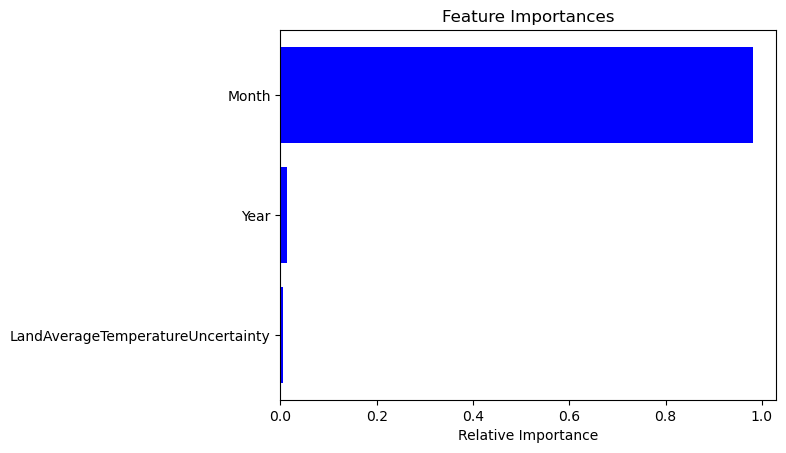

In [19]:
importances = regressor.feature_importances_ 
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

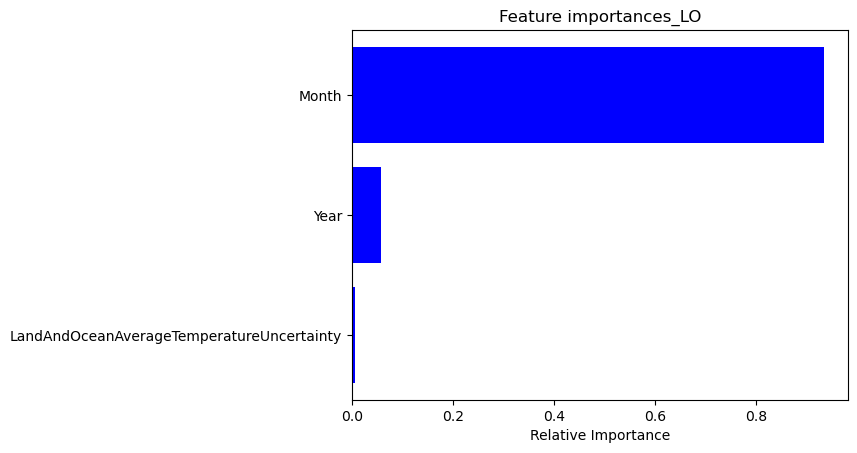

In [20]:
importances_LO = regressor_LO.feature_importances_ 
indices = np.argsort(importances_LO)
plt.title('Feature importances_LO')
plt.barh(range(len(indices)), importances_LO[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x_LO.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Actual values vs Predictions

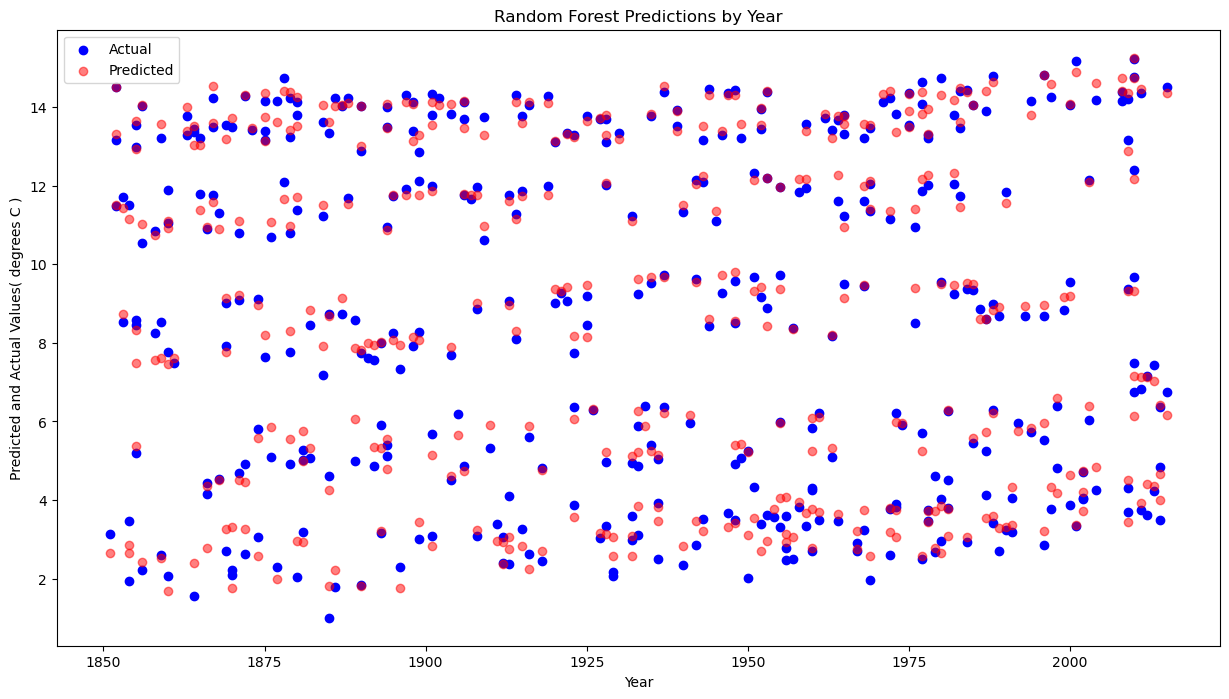

In [21]:
x_axis_data = x_test['Year']

#coefficients_predicted = np.polyfit(x_axis_data, y_predicted, 1)
#coefficients_actual = np.polyfit(x_axis_data, y_test, 1)
#
#poly_predicted = np.poly1d(coefficients_predicted)
#poly_actual = np.poly1d(coefficients_actual)
#
#best_fit_line_predicted = poly_predicted(x_axis_data)
#best_fit_line_actual = poly_actual(x_axis_data)

plt.figure(figsize=(15, 8))
plt.scatter(x_axis_data, y_test, color='blue' ,label='Actual')
plt.scatter(x_axis_data, y_predicted, color='red', label='Predicted', alpha=0.5)
#plt.plot(x_axis_data, best_fit_line_predicted, color='red', label='Best Fit Line', alpha=0.5)  # Line of best fit
#plt.plot(x_axis_data, best_fit_line_actual, color='blue', label='Best Fit Line', alpha=0.5)  # Line of best fit
plt.title('Random Forest Predictions by Year')
plt.xlabel('Year')
plt.ylabel('Predicted and Actual Values( degrees C )')
plt.legend()
plt.show()

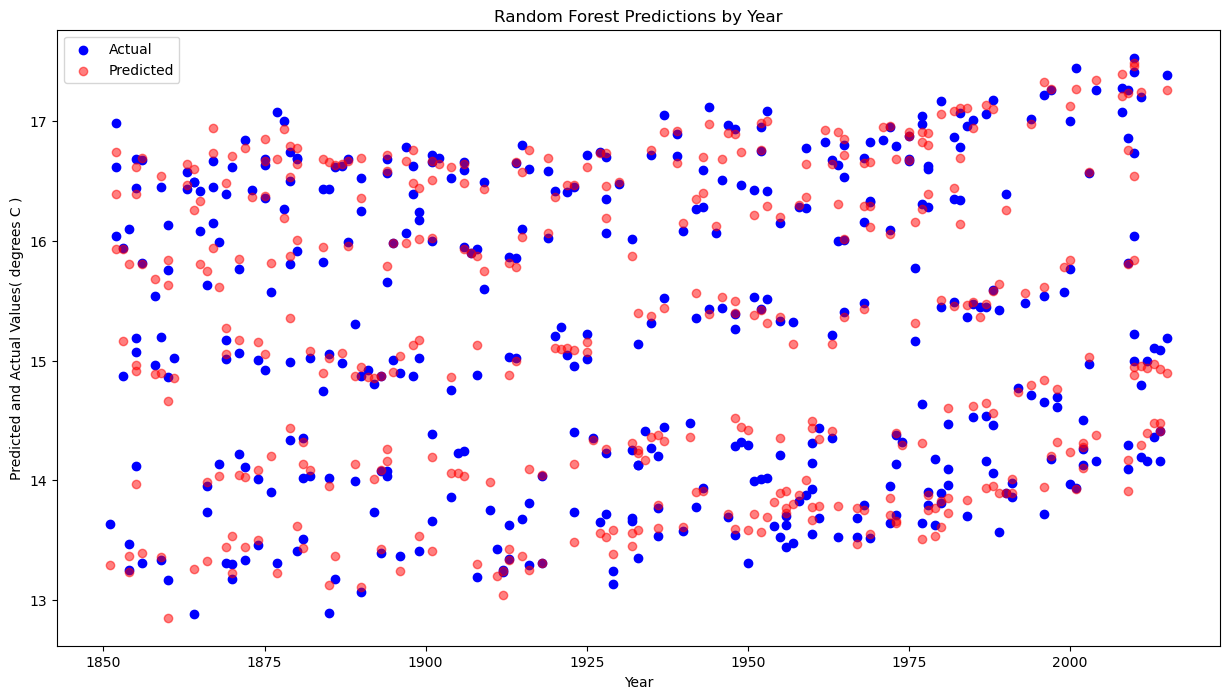

In [22]:
x_axis_data = x_LO_test['Year']
plt.figure(figsize=(15, 8))
plt.scatter(x_axis_data, y_LO_test, color='blue' ,label='Actual')
plt.scatter(x_axis_data, y_LO_predicted, color='red', label='Predicted', alpha=0.5)
plt.title('Random Forest Predictions by Year')
plt.xlabel('Year')
plt.ylabel('Predicted and Actual Values( degrees C )')
plt.legend()
plt.show()

# Actual and Predicted Temperatures by Month

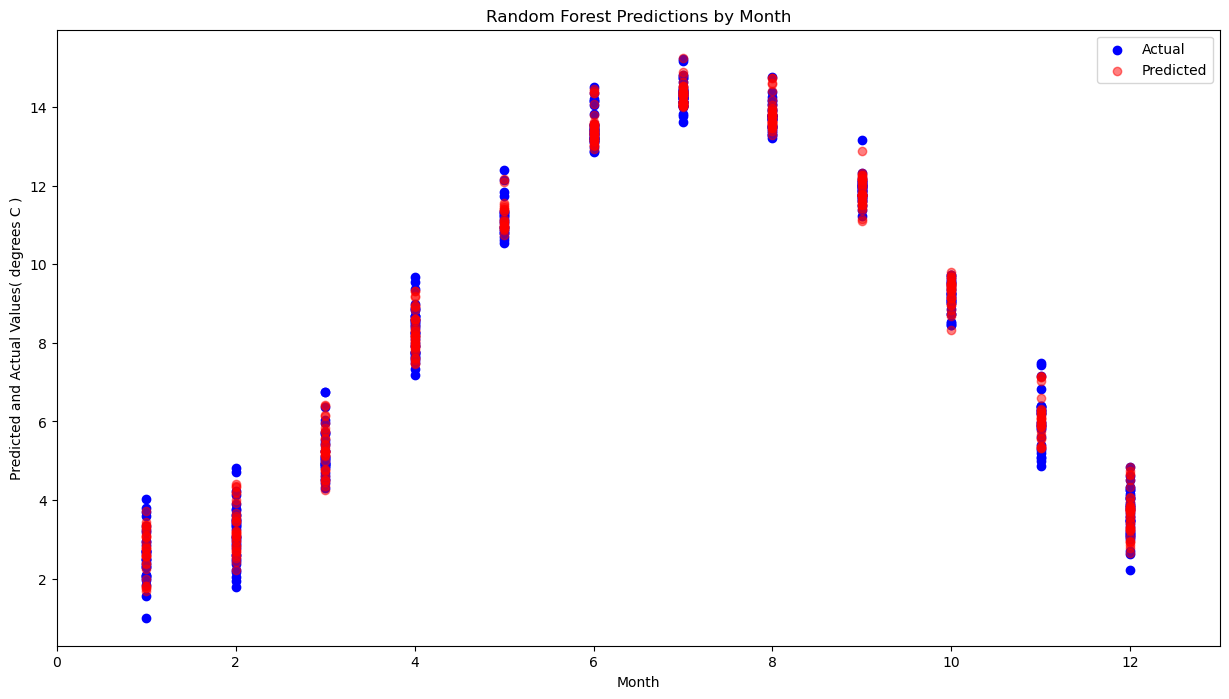

In [23]:
x_axis_data = x_test['Month']
plt.figure(figsize=(15, 8))
plt.scatter(x_axis_data, y_test, color='blue' ,label='Actual')
plt.scatter(x_axis_data, y_predicted, color='red', label='Predicted', alpha=0.5)
plt.xlim(0,13)
plt.title('Random Forest Predictions by Month')
plt.xlabel('Month')
plt.ylabel('Predicted and Actual Values( degrees C )')
plt.legend()
plt.show()

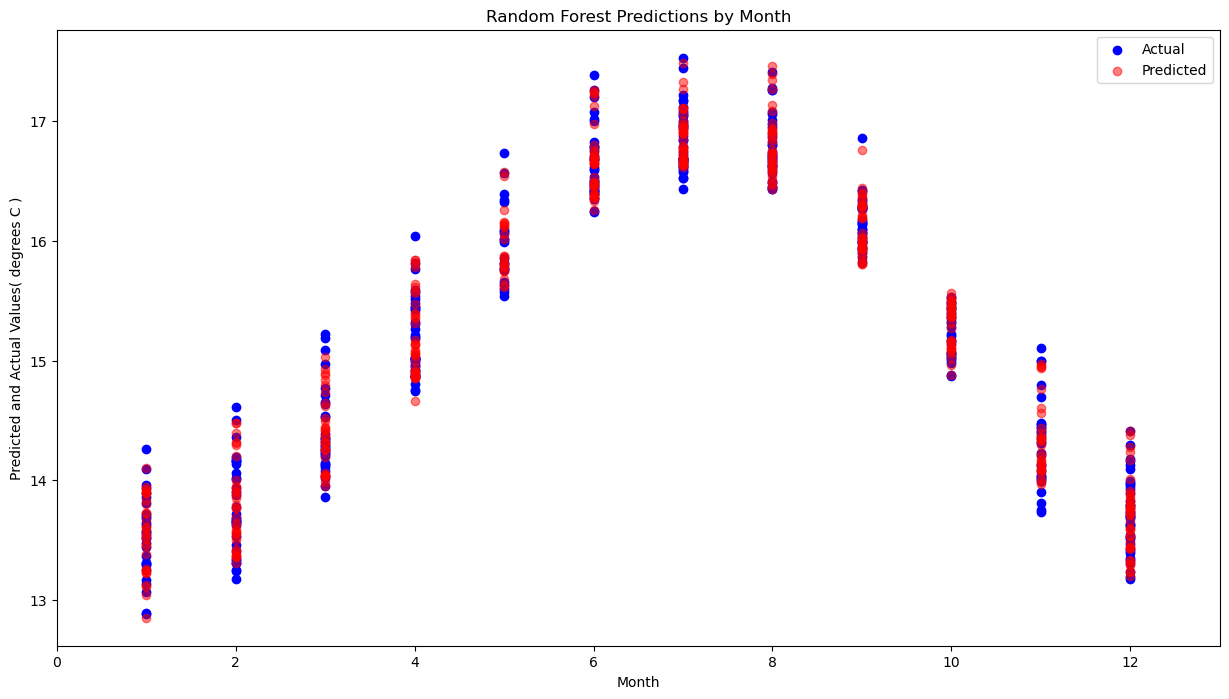

In [24]:
x_axis_data = x_LO_test['Month']
plt.figure(figsize=(15, 8))
plt.scatter(x_axis_data, y_LO_test, color='blue' ,label='Actual')
plt.scatter(x_axis_data, y_LO_predicted, color='red', label='Predicted', alpha=0.5)
plt.xlim(0,13)
plt.title('Random Forest Predictions by Month')
plt.xlabel('Month')
plt.ylabel('Predicted and Actual Values( degrees C )')
plt.legend()
plt.show()